In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [2]:
data, labels = make_blobs(n_samples=1000, centers=4,n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


In [3]:
data

array([[-2.50804312,  7.86408052],
       [ 0.4666179 ,  3.86571303],
       [-2.94062621,  8.56480636],
       ...,
       [-1.13551783,  8.49272771],
       [-1.22933367,  7.75342586],
       [ 3.90485877,  0.683497  ]])

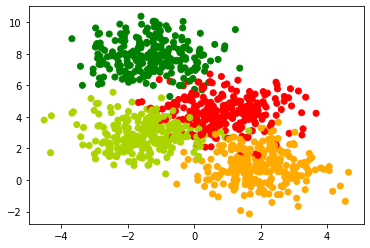

In [4]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])
plt.scatter(data[:,0], data[:,1], c = labels, cmap = my_cmap)
plt.show()

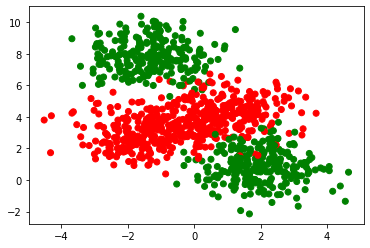

In [4]:
labels_orig = labels

#converting the multi-class to binary class
labels = np.mod(labels_orig,2)
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [5]:
# Test train split
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels,random_state=0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


# Sigmoid Neuron 

In [6]:
# from tqdm_notebook import tqdm_notebook
class SigmoidNeuron:
  
    def __init__(self):
        self.w = None    
        self.b = None
    
    # forward pass  
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b
  
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))   # Sigmoid function
  
    # updating the gradients (weight and bias) using mean squared error loss
    def grad_w_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
  
    def grad_b_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
  
    # updating the gradients using cross entropy loss
    def grad_w_ce(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        if y == 0:
            return y_pred * x
        elif y == 1:
            return -1 * (1 - y_pred) * x
        else:
            raise ValueError("y should be 0 or 1")
    
    def grad_b_ce(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        if y == 0:
            return y_pred 
        elif y == 1:
            return -1 * (1 - y_pred)
        else:
            raise ValueError("y should be 0 or 1")
  
    # model fit method
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):
    
        # initialise w, b
        if initialise:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
      
        if display_loss:
            loss = {}
    
        for i in tqdm(range(epochs),desc = "Progess Bar", total=epochs, unit="epoch"):
            dw = 0
            db = 0
            for x, y in zip(X, Y):
                if loss_fn == "mse":
                    dw += self.grad_w_mse(x, y)
                    db += self.grad_b_mse(x, y) 
                elif loss_fn == "ce":
                    dw += self.grad_w_ce(x, y)
                    db += self.grad_b_ce(x, y)
          
            m = X.shape[1]    
            self.w -= learning_rate * dw/m
            self.b -= learning_rate * db/m
      
            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                if loss_fn == "mse":
                    loss[i] = mean_squared_error(Y, Y_pred)
                elif loss_fn == "ce":
                    loss[i] = log_loss(Y, Y_pred)
    
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            if loss_fn == "mse":
                plt.ylabel('Mean Squared Error')
            elif loss_fn == "ce":
                plt.ylabel('Log Loss')
            plt.show()
      
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

In [7]:
! pip install tdqm_notebook

ERROR: Could not find a version that satisfies the requirement tdqm_notebook (from versions: none)
ERROR: No matching distribution found for tdqm_notebook


Progess Bar: 100%|██████████████████████████████████████████████████████████████| 2000/2000 [00:42<00:00, 47.52epoch/s]


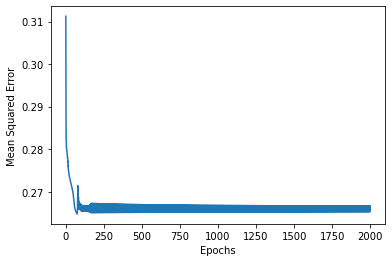

In [8]:
sn = SigmoidNeuron()  # Create object of Sigmoid Neuron class

#training the model over 2000 epochs
sn.fit(X_train, Y_train, epochs=2000, learning_rate=1, display_loss =True)

In [9]:
Y_pred_train = sn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = sn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.73
Validation accuracy 0.71


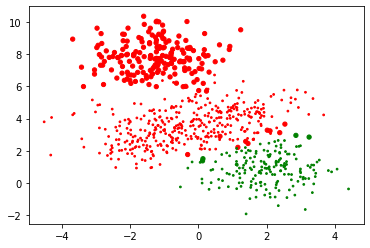

In [10]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

# Feed Forward Network

In [11]:
class FirstFFNetwork:
    def __init__(self):
        # set random weights
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0
        
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def forward_pass(self, x):
        
        # a = weighted sum of inputs +  bias (pre-activation function)
        # h = Sigmoid Activation Function.
        
        self.x1, self.x2 = x
        self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
        self.h1 = self.sigmoid(self.a1)
        self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
        self.h2 = self.sigmoid(self.a2)
        self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
        self.h3 = self.sigmoid(self.a3)
        return self.h3
    
    def grad(self, x, y):
        
        # Inputs x and y to compute the forward pass. 
        # Based on the forward pass compute partial derivates of these weights wrt loss function (mean sq. error)
        
        self.forward_pass(x)

        self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
        self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
        self.db3 = (self.h3-y) * self.h3*(1-self.h3)

        self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
        self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
        self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)

        self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
        self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
        self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)
        
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
        # initialise w, b
        if initialise:
            self.w1 = np.random.randn()
            self.w2 = np.random.randn()
            self.w3 = np.random.randn()
            self.w4 = np.random.randn()
            self.w5 = np.random.randn()
            self.w6 = np.random.randn()
            self.b1 = 0
            self.b2 = 0
            self.b3 = 0

        if display_loss:
            loss = {}

        for i in tqdm(range(epochs), total=epochs, unit="epoch"):
            dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
            for x, y in zip(X, Y):
                self.grad(x, y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3

            m = X.shape[1]
            self.w1 -= learning_rate * dw1 / m
            self.w2 -= learning_rate * dw2 / m
            self.w3 -= learning_rate * dw3 / m
            self.w4 -= learning_rate * dw4 / m
            self.w5 -= learning_rate * dw5 / m
            self.w6 -= learning_rate * dw6 / m
            self.b1 -= learning_rate * db1 / m
            self.b2 -= learning_rate * db2 / m
            self.b3 -= learning_rate * db3 / m

            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = mean_squared_error(Y_pred, Y)

        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
            
    def predict(self, X):
        #predict result on test data
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred)       

100%|███████████████████████████████████████████████████████████████████████████| 2000/2000 [00:49<00:00, 40.28epoch/s]


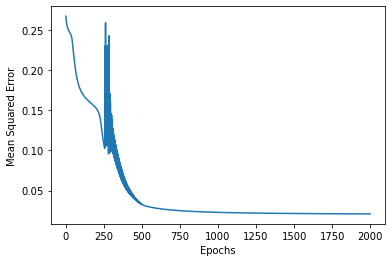

In [12]:
ffn = FirstFFNetwork()
ffn.fit(X_train, Y_train, epochs=2000, learning_rate=.01, display_loss=True)

In [13]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.98
Validation accuracy 0.94


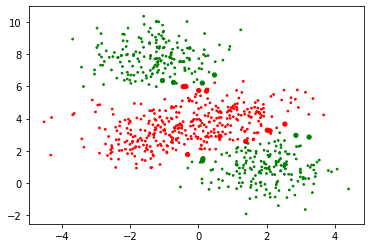

In [14]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

# Generic Code

In [15]:
class FFSNNetwork:
    def __init__(self, n_inputs, hidden_sizes=[2]):
        self.nx = n_inputs  # n_input means number of inputs
        self.ny = 1
        self.nh = len(hidden_sizes) # hidden_size means number of neurons with respective hidden layer
        # hidden_sizes =[2] means two neurons in hidden layer
        # hidden_sizes = [2,3] means 2 neuron in first layer and 3 neuron in the second layer
        self.sizes = [self.nx] + hidden_sizes + [self.ny]
        self.W = {}
        self.B = {}
        for i in range(self.nh+1):
            self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
            self.B[i+1] = np.zeros((1, self.sizes[i+1]))
  
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
  
    def forward_pass(self, x):
        self.A = {}
        self.H = {}
        self.H[0] = x.reshape(1, -1)
        for i in range(self.nh+1):
            self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
            self.H[i+1] = self.sigmoid(self.A[i+1])
        return self.H[self.nh+1]
  
    def grad_sigmoid(self, x):
        return x*(1-x)
    
    def grad(self, x, y):
        self.forward_pass(x)
        self.dW = {}
        self.dB = {}
        self.dH = {}
        self.dA = {}
        L = self.nh + 1
        self.dA[L] = (self.H[L] - y)
        for k in range(L, 0, -1):
            self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
            self.dB[k] = self.dA[k]
            self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
            self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))

# DL 4 

NameError: name 'Z' is not defined

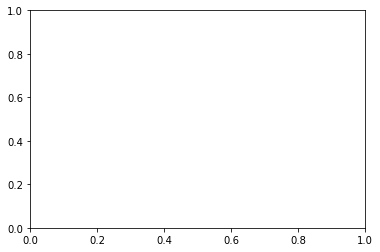

In [16]:
# Creating 2-D grid of features
[X, Y] = np.meshgrid(X_train, Y_train)
  
fig, ax = plt.subplots(1, 1)
  
ax.contourf(X, Y, Z)
  
ax.set_title('Filled Contour Plot')
  
plt.show()

In [ ]:
import plotly.graph_objects as go

x = np.random.uniform(-1, 1, size=500)
y = np.random.uniform(-1, 1, size=500)

fig = go.Figure(go.Histogram2dContour(
        x = x,
        y = y,
        colorscale = 'Blues'
))

fig.show()

In [ ]:
! pip install plotly

In [ ]:
import numpy as np

a = np.array([[2,3,4],[1,3,4]])
b = np.shape(a)
c = a.shape[1]
print(c)
